# Projet Greedy Algorithm, NAVARRE Victor CACHERA Alexandre

## Modules

In [8]:
#Importation des librairies

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import minimize

## Données 

In [29]:
# Premier test
t = np.linspace(0, 1, 100)
K = np.linspace(0, 10, 1000)
F1 = [np.sin(k * t) for k in K]

# Deuxième test 

## Algorithmes Gloutons

### Fonctions de base 

In [ ]:
def proj(f, Vn):

    V = np.column_stack(Vn) 
    coeffs, _, _, _ = np.linalg.lstsq(V, f, rcond=None)
    proj = V @ coeffs
    return proj

#Si la première méthode ne fonctionne pas :
def proj2(f, V):
    """Projection sur V pour la norme L1 (approchée via optimisation)."""
    A = np.column_stack(V)
    def loss(x):
        return np.linalg.norm(A @ x - f, ord=1)
    res = minimize(loss, np.zeros(len(V)))
    return A @ res.x

def dist(f,Vn):
    return(np.linalg.norm(f-proj(f,Vn)))

### Algorithme Strong Greedy

In [ ]:
def stronggreedy(F, n):
    
    Vn=[]
    Sigma = []
    id_f0 = np.argmax([np.linalg.norm(f) for f in F]) 
    f0 = F[id_f0]
    Vn.append(f0)           
    Sigma.append(np.linalg.norm(f0))

    for i in range(n):
        id_f = np.argmax([dist(f, Vn) for f in F]) 
        f = F[id_f]
        Sigma.append(dist(f,Vn))
        Vn.append(f)            
    
    return Vn, Sigma

### Algorithme Weak Greedy

On commence par décrire l'Algorithme Greedy faible pour les n-withd, on réalise une implémentation récursive

In [54]:
def weakgreedy(F, gamma, n, sample_size):
    
    Vn=[]
    Sigma = []
    id_f0 = np.argmax([np.linalg.norm(f) for f in F]) 
    f0 = F[id_f0]
    Vn.append(f0)          
    Sigma.append(np.linalg.norm(f0))
    
    for i in range(n):
        
        # On cherche une approximation de la distance maximale
        sample_indices = np.random.choice(len(F1), size=sample_size, replace=False)
        sample_distances = []
        
        for idx in sample_indices:
            f = F[idx]
            sample_distances.append(dist(f,Vn))

        current_max = np.max(sample_distances)

        for f in F:   #ici premier choisi, sinon les tirer tous et choisir &léatoirement parmi les bons candidats
            if dist(f,Vn) >= gamma*current_max:
                Sigma.append(np.max([dist(f,Vn) for f in F]))
                Vn.append(f)  
                break
    return Vn, Sigma


## Algorithme de PCA 

In [2]:
def pca_reduction(F, n):
    pca = PCA(n_components=n)
    F_pca = pca.fit_transform(np.array(F))
    F_reconstructed = pca.inverse_transform(F_pca)
    mse = np.mean([np.linalg.norm(f - fr)**2 for f, fr in zip(F, F_reconstructed)])
    return F_reconstructed, mse

## Comparaison et Analyse des résultats

### Résultats Weak Greedy

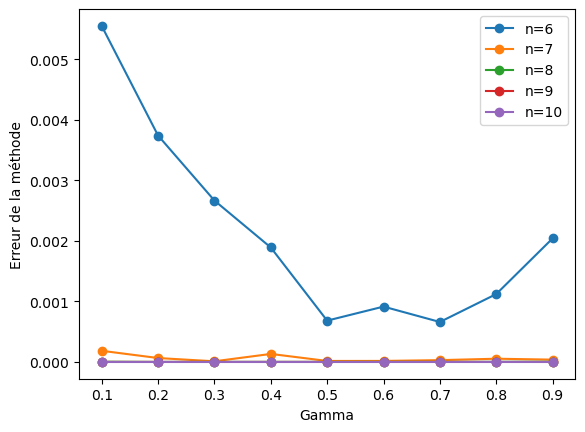

In [46]:
gammaValues = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
def greedy_errors_weak(n):
    greedy_errors_weak_gamma = [weakgreedy(F1, gamma, n, 80)[1][-1] for gamma in gammaValues]
    plt.plot(gammaValues, greedy_errors_weak_gamma, 'o-', label=f'n={n}')

for i in range( 6,11):
    greedy_errors_weak(i)
plt.xlabel('Gamma')
plt.ylabel('Erreur de la méthode')
plt.legend()
plt.show()

### Comparaison Strong et Weak

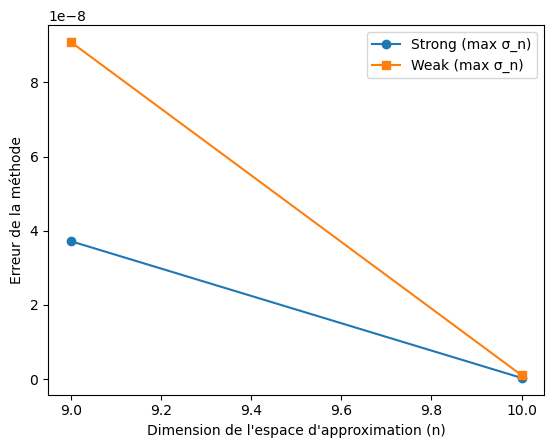

In [59]:
n_values = range(9, 11)

greedy_errors_strong = [stronggreedy(F1, n)[1][-1] for n in n_values]  
greedy_errors_weak = [weakgreedy(F1, 0.7, n, 100)[1][-1] for n in n_values]  

plt.plot(n_values, greedy_errors_strong, 'o-', label='Strong (max σ_n)')
plt.plot(n_values, greedy_errors_weak, 's-', label='Weak (max σ_n)')
plt.xlabel('Dimension de l\'espace d\'approximation (n)')
plt.ylabel('Erreur de la méthode')
plt.legend()
plt.show()

### Comparaison des résultats entre Strong et PCA

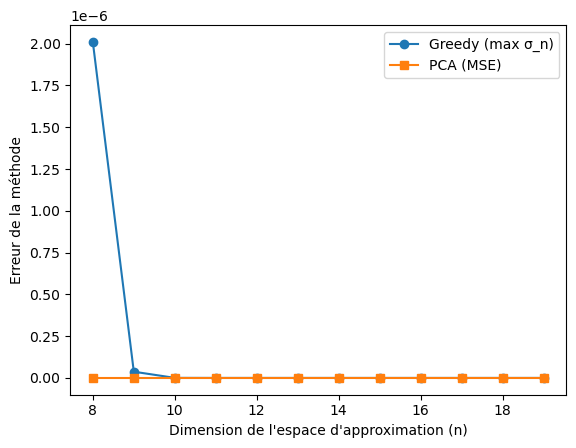

In [ ]:
n_values = range(8, 20)

greedy_errors_strong = [stronggreedy(F1, n)[1][-1] for n in n_values] 
pca_errors = [pca_reduction(F1, n)[1] for n in n_values]  

plt.plot(n_values, greedy_errors_strong, 'o-', label='Greedy (max σ_n)')
plt.plot(n_values, pca_errors, 's-', label='PCA (MSE)')
plt.xlabel('Dimension de l\'espace d\'approximation (n)')
plt.ylabel('Erreur de la méthode')
plt.legend()
plt.show()

In [39]:
pca_reduction(F1, 9)[1]

1.1499493376694455e-16

## Conclusion


La PCA reste meilleure, le strong meilleure que le weak, mais pas de beaucoup et donc autant prendre le gain de temps.